#### CMSE 201 Final Project
### &#9989; Shiloh Maliskey
### &#9989; Section_001
#### &#9989; 04/24/2022

# 1 ___Box Office Revenue Prediction___

## 1.1 Background and Motivation

Initially I knew that I was interested in doing something with movies, but I wasn't sure exactly what that would be. After searching, I came across a competition on Kaggle that was created a couple of years ago and dealt with box office revenues. It had a large dataset that contained many useful variables along with 2,833 movies, so I thought it would be perfect for my project. I wanted to use this information to answer the question, "What various movie features have the highest correlation with box office revenue?" and to see if there were certain features that could help to predict if a movie would be "successful" in terms of monetary value.

## 1.2 Methodology

Dataset: https://www.kaggle.com/competitions/tmdb-box-office-prediction/overview

In [1]:
# Necessary imports

import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import math
import re # Helps to work with regular expressions
from sklearn.linear_model import LinearRegression

In [2]:
# Read in the data

movie = pd.read_csv("train.csv")

Some of the information that I would be using was incorrect in the dataset, so this had to be fixed. The code was taken from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3

In [3]:
# Revising some wrong information, taken from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3

movie.loc[movie['id'] == 16,'revenue'] = 192864          # Skinning
movie.loc[movie['id'] == 90,'budget'] = 30000000         # Sommersby          
movie.loc[movie['id'] == 118,'budget'] = 60000000        # Wild Hogs
movie.loc[movie['id'] == 149,'budget'] = 18000000        # Beethoven
movie.loc[movie['id'] == 313,'revenue'] = 12000000       # The Cookout 
movie.loc[movie['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
movie.loc[movie['id'] == 464,'budget'] = 20000000        # Parenthood
movie.loc[movie['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
movie.loc[movie['id'] == 513,'budget'] = 930000          # From Prada to Nada
movie.loc[movie['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
movie.loc[movie['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
movie.loc[movie['id'] == 850,'budget'] = 90000000        # Modern Times
movie.loc[movie['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
movie.loc[movie['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
movie.loc[movie['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
movie.loc[movie['id'] == 1542,'budget'] = 1              # All at Once
movie.loc[movie['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
movie.loc[movie['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
movie.loc[movie['id'] == 1714,'budget'] = 46000000       # The Recruit
movie.loc[movie['id'] == 1721,'budget'] = 17500000       # Cocoon
movie.loc[movie['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
movie.loc[movie['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
movie.loc[movie['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
movie.loc[movie['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
movie.loc[movie['id'] == 2612,'budget'] = 15000000       # Field of Dreams
movie.loc[movie['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
movie.loc[movie['id'] == 2801,'budget'] = 10000000       # Fracture

movie.head() # Visual of the original dataset

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Since the format of the "release_date" column was a bit messy and hard to work with, a function was created so that it could convert it from a character data type to the datetime data type in order to view the month, day, and year in individual columns.

In [4]:
# Function to convert release_date column from the character data type to the datetime data type

def date_features_conv(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df.drop(columns=['release_date'], inplace=True)
    return df

movie = date_features_conv(movie) # Running the function on the train dataset

The dataset originally had 23 columns, some of which would not be relevant to this project, so it was necessary to drop ones such as: 'tagline', 'homepage','overview','poster_path','status','original_title','original_language','imdb_id','title','production_countries','cast','crew', and 'production_companies.' Some of the columns were also a bit hard to work with so for columns such as "belongs_to_collection", if the movie was a part of a collection the value was changed to 1 and if not, 0 in order to make it easier to do analysis on. This was also done for columns such as: 'keywords' and 'spoken languages.'

In [5]:
# Dropping unnecessary columns a

movie_1 = movie.drop(columns=['tagline', 'homepage','overview','poster_path','status','original_title','original_language','imdb_id','title','production_countries','cast','crew','production_companies', 'genres'])

# Setting NaN values in "belongs_to_collection" equal to 0 and strings equal to 1

movie_1.belongs_to_collection = movie_1.belongs_to_collection.apply(lambda x: 1 if type(x) == str else 0)

# Using the "Keywords" column to create a new column "has_keywords" where if the movie has keywords, it will be set to 1 and if it doesn't, it will be set to 0

movie_1['has_keywords'] = movie_1.Keywords.apply(lambda x: 1 if type(x) == str else 0)

# The "spoken_languages" column was a bit hard to work with so I used this code taken from https://github.com/nickmitch21/TMDB-Box-Office-Prediction/blob/master/TMDbMovieBoxOfficePredictionModel.ipynb which contains various lamda functions to help seperate the "spoken_languages" column into a new column that contains the same information but is much easier to work with

movie_1.spoken_languages = movie_1.spoken_languages.fillna("")
movie_1['spoken_languages_reform'] = movie_1['spoken_languages'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
movie_1['released_in_english'] = movie_1['spoken_languages_reform'].apply(lambda x: 1 if 'English' in x else 0)

# The "runtime" column had some missing values for specific movies so a new column was created that filled the NaN values with the median runtime 

movie_1.runtime = movie_1.runtime.fillna(movie_1.runtime.median())
median = movie_1.loc[movie_1['runtime'] > 0, 'runtime'].median()
movie_1["new_runtime"] = movie_1["runtime"].mask(movie_1["runtime"] == 0, median)

Some of the movies in the original dataset had values greater than the current year for the "release_year" column so those needed to be dropped.

In [6]:
# Deleting any movies that had a year larger than 2022

final_movie = movie_1.drop(movie_1[movie_1['release_year'] > 2022].index)

final_movie.head()

,id,belongs_to_collection,budget,popularity,runtime,spoken_languages,Keywords,revenue,release_year,release_month,has_keywords,spoken_languages_reform,released_in_english,new_runtime
0,1,1,14000000,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 4379, 'name': 'time travel'}, {'id': 9...",12314651,2015,2,1,[English],1,93.0
1,2,1,40000000,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 2505, 'name': 'coronation'}, {'id': 42...",95149435,2004,8,1,[English],1,113.0
2,3,0,3300000,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",13092000,2014,10,1,[English],1,105.0
3,4,0,1200000,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",16000000,2012,3,1,"[English, हिन्दी]",1,122.0
4,5,0,0,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",NaN,3923970,2009,2,0,[한국어/조선말],0,118.0


Throughout this project, the main variable that we will be comparing other movie features against is revenue. I though it was appropriate to print out both the mean and median revenues of the dataset (see below) along with a visualization of what the revenue looks like.

Mean Movie Revenue: 69561256.58
Median Movie Revenue: 17953778.00


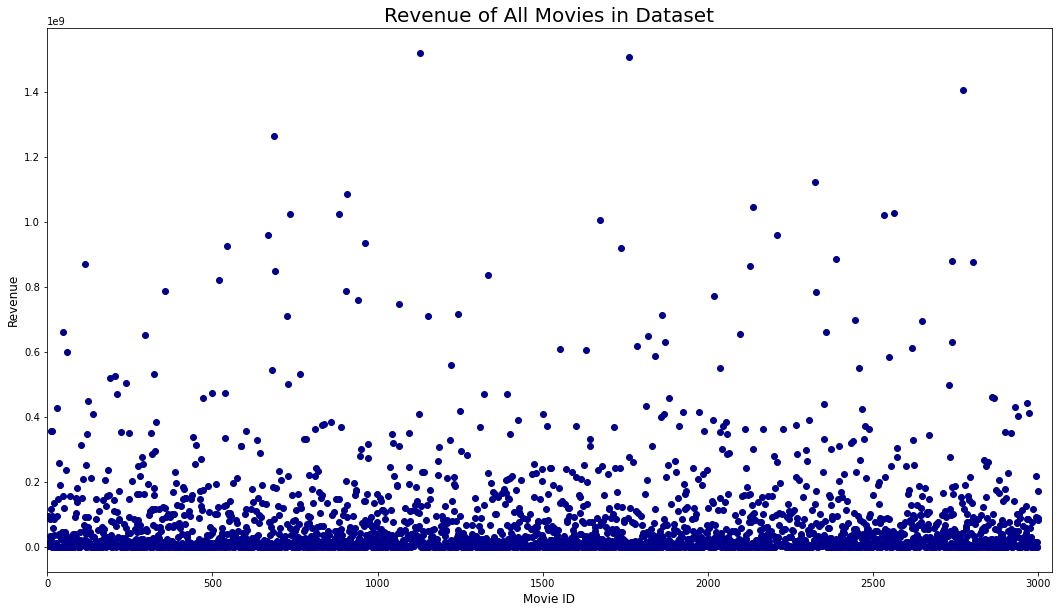

In [7]:
# Analyze Revenue 

print("Mean Movie Revenue: %.2f" % final_movie.revenue.mean())
print("Median Movie Revenue: %.2f" % final_movie.revenue.median())

# Plotting Revenue Data (Scatter)

plt.figure(figsize=(18,10))
plt.scatter(final_movie['id'],final_movie['revenue'], color = "darkblue")
plt.title("Revenue of All Movies in Dataset", fontsize = 20)
plt.xlabel("Movie ID", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.xlim([0, 3040])
plt.show()

# Analyzing & Plotting Collection Data

Originally, the column that gave information regarding if the movie was a part of a collection or not actually contained either the collection the movie was a part of or the value "NaN" if it wasn't a part of any collection. This seemed like it would be very difficult to work with so instead if the movie was in a collection the value was set to 1 and if it was not in a collection, it was set to 0. This made it much easier to work with and to be able to display the pie chart and boxplot shown below.

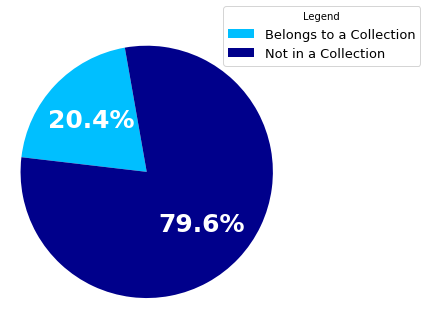

In [8]:
# Plotting Collection Data (Pie Chart)

zero_one_sum = [sum(final_movie.belongs_to_collection), (final_movie.belongs_to_collection == 0).sum(axis=0)] # Getting the percentages for the zeroes and ones

# Plot (Pie Chart)

fig = plt.figure(figsize = (5, 5))
plt.pie(zero_one_sum, autopct = "%0.1f%%", startangle = 100, colors = ("deepskyblue", "darkblue"), textprops = {"color":"w", "fontsize": 25, "weight":"bold"})
plt.axis("equal")

plt.legend(labels = ("Belongs to a Collection", "Not in a Collection"), title = "Legend", loc = "center left", fontsize = 13, bbox_to_anchor = (0.75, 0.25, 0.5, 1.5))

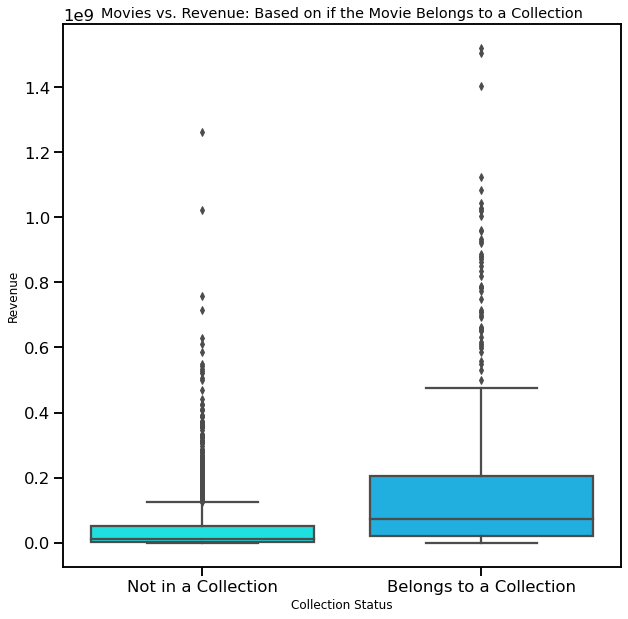

In [9]:
# Plotting Collection Data (Boxplot)

sns.set_context("talk")
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(x = "belongs_to_collection", y = "revenue", data = final_movie, palette = ("cyan","deepskyblue"))
plt.title("Movies vs. Revenue: Based on if the Movie Belongs to a Collection", fontsize = 14.5)
plt.ylabel("Revenue", fontsize = 12)
plt.xlabel("Collection Status", fontsize = 12)
labels = "Not in a Collection", "Belongs to a Collection"
ax.set_xticklabels(labels)
plt.show()

Although you can see by the pie chart that the majority of the movies in this dataset do not belong to a collection, the boxplot shows that revenue seems to be greater for the movies that are a part of one. This could end up being an important feature when predicting revenue because customers may be more likely to see a movie that is a part of a collection that they have already spent time and money to watch. This will be interesting to analyze more later on to see if there is indeed a positive correlation between belonging to a collection and revenue, and if so, what that correlation might tell us.

# Analyzing & Plotting Budget Data

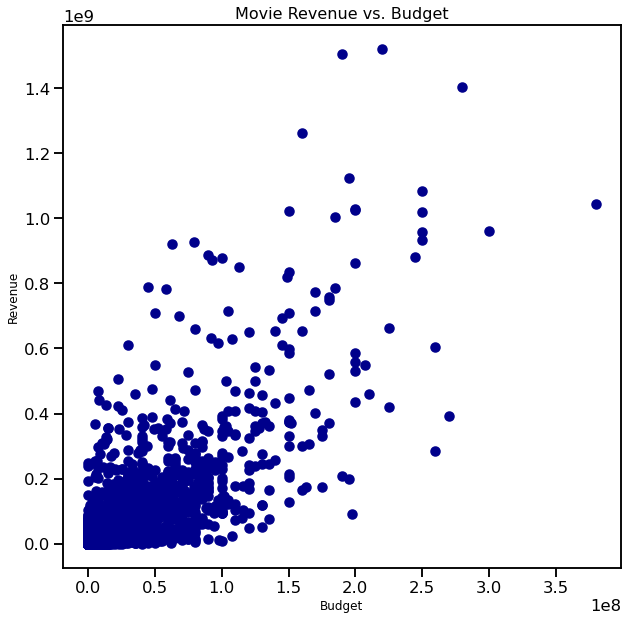

In [10]:
# Plotting Budget Data (Scatter)

plt.figure(figsize = (10, 10))
plt.scatter(final_movie['budget'], final_movie['revenue'], color = "darkblue")
plt.title("Movie Revenue vs. Budget", fontsize = 16);
plt.xlabel("Budget", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.show()

When thinking about what features might correlate the most with revenue, budget is probably one of the first ones that come to mind. Although there wasn't a ton to plot since the budget column was very straightforward, the scatter plot does seem to show some positive correlation so this will be a good feature to potentially analyze more later on. 

# Analyzing & Plotting Popularity Data

The popularity column of the dataset contains a number indicating the popularity of that movie. In this context, popularity is based off of the number of votes for the day, number of views for the day, number of users who marked it as a "favorite" for the day, number of users who added it to their "watchlist" for the day, release date, number of total votes, and the previous days score.

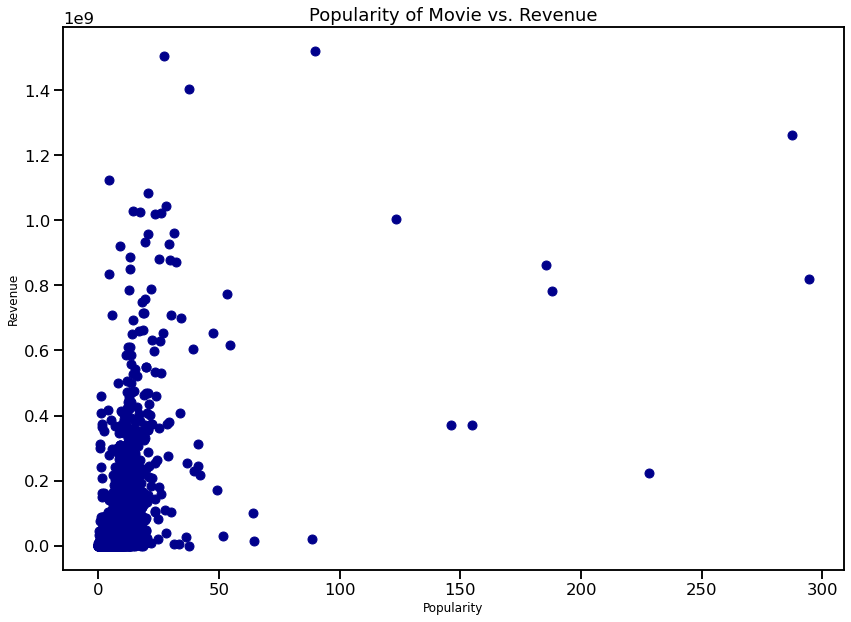

In [11]:
# Plotting Popularity Data (Scatter)

plt.figure(figsize = (14, 10))
plt.plot(final_movie['popularity'], final_movie['revenue'], 'o', color = "darkblue")
plt.xlabel("Popularity", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.title("Popularity of Movie vs. Revenue", fontsize = 18)
plt.show()

Popularity is likely to be an important feature in predicting revenue given the importance of popularity for viewership. Since more popularity is a good thing for marketing, and will most likely increase ticket sales, it makes sense that according to the plot shown above, there seems to be somewhat of an overall positive correlation between the two. This is to be expected given the influence of popularity on a movie's revenue because of more recognition. Although it might not be a perfect feature in this context due to the fact that popularity probably wouldn't be able to be determined until after the movie comes out, it still might be useful to do some further analysis later on. 

# Analyzing & Plotting Runtime Data


The "runtime" column represents the runtime of the movie in minutes. The runtime might have an impact on revenue, as it is possible that movies that are deemed 'too long' or 'too short' may get less views and therefore less money. 

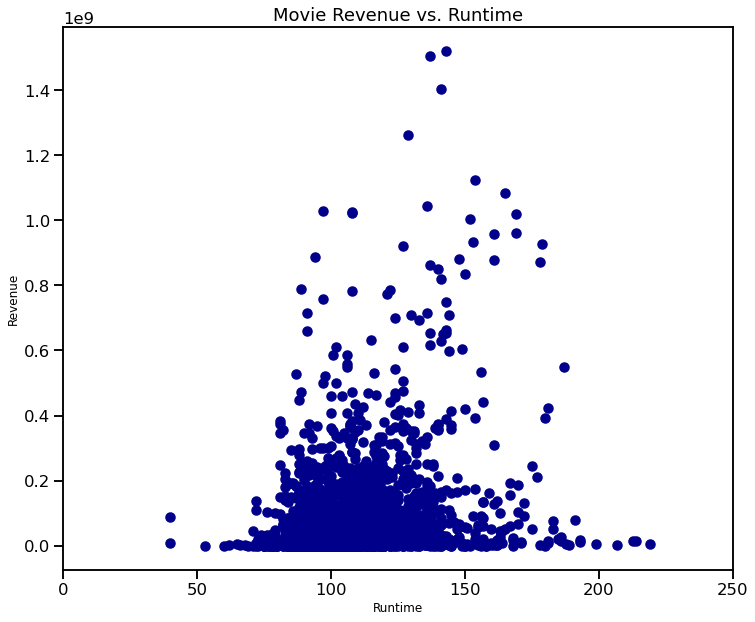

In [12]:
# Plotting Runtime Data (Scatter)

plt.figure(figsize = (12, 10))
plt.scatter(final_movie['new_runtime'], final_movie['revenue'], color = 'darkblue')
plt.title("Movie Revenue vs. Runtime", fontsize = 18)
plt.xlabel("Runtime", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.xlim([0, 250])
plt.show()

According to the plot above, it appears that there might be some positive correlation between runtime and revenue which can be further analyzed later on to see how much they might actually be correlated.

# Analyzing & Plotting Keyword Data


Originally, the dataset had a column that detailed the exact keywords for each movie, but this was changed so that we would just be analyzing whether the movie had specific keywords or if it didn't have any keywords at all. Since having keywords might make a movie easier to find online, it might help more people learn about the movie, which could lead to higher revenue.

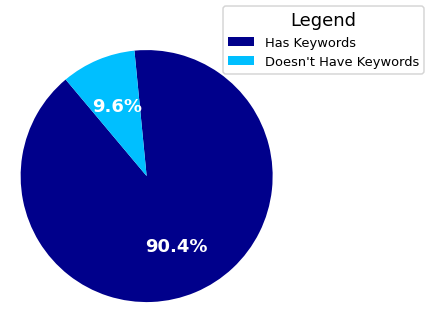

In [13]:
# Plotting Keyword Data (Pie Chart)

keywords_sum = [sum(final_movie.has_keywords), (final_movie.has_keywords == 0).sum(axis=0)] # Getting the percentages for the zeroes and ones

# Plot (Pie Chart)

fig = plt.subplots(figsize = (5, 5))
plt.pie(keywords_sum, autopct = "%0.1f%%", startangle = 130, colors = ("darkblue","deepskyblue"), textprops = {"color":"w", "fontsize": 18, "weight":"bold"})
plt.axis("equal") 

plt.legend(labels = ("Has Keywords", "Doesn't Have Keywords"), title = "Legend", loc = "center left", fontsize = 13, bbox_to_anchor = (0.75, 0.25, 0.5, 1.5))

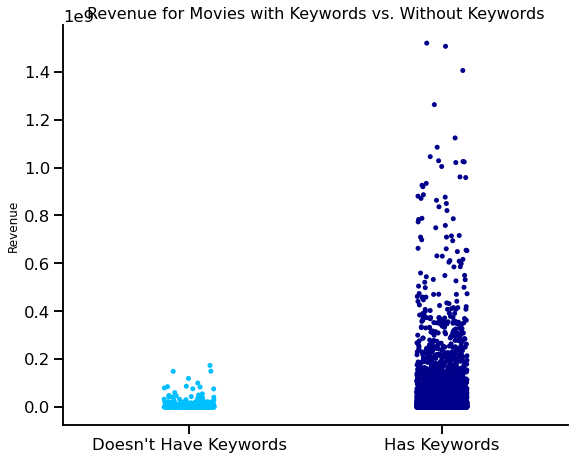

In [14]:
# Plotting Keyword Data (Catplot)

sns.set_context("talk")
ax = sns.catplot(x = "has_keywords", y = "revenue", data = final_movie, palette = ("deepskyblue","darkblue"), height = 7, aspect = 1.2);
plt.title("Revenue for Movies with Keywords vs. Without Keywords", fontsize = 16)
labels = ("Doesn't Have Keywords", "Has Keywords")
plt.xlabel("")
plt.ylabel("Revenue", fontsize = 12)
ax.set_xticklabels(labels)

According to the pie chart, the majority of the movies in this dataset do contain keywords. The catplot also shows that revenue seems to be greater for the movies that have keywords too. This seems to indicate that there is some sort of positive correlation between the presence of keywords in a movie and revenue. 

# Analyzing & Plotting Release Data

Originally, the column containing the information about the date that the movie was released was just contained into one column, but later on it was separated into the release month and release year to make it easier to analyze. I am not entirely sure there will be any clear correlation between these features and revenue, but thought it may be worthwhile to plot anyways.

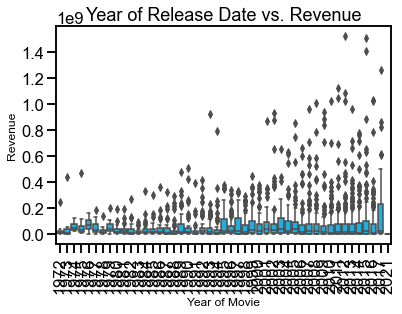

In [15]:
# Plotting Release Data By Year (Boxplot)

fig, bx = plt.subplots()
sns.set_context("talk")
sns.set(rc = {'figure.figsize':(18, 10)})
sns.boxplot(x = final_movie['release_year'], y = final_movie['revenue'], color = "deepskyblue")
bx.set_xticklabels(bx.get_xticklabels(), rotation=90)
bx.set_xlabel("Year of Movie", fontsize = 12)
bx.set_ylabel("Revenue", fontsize = 12)
bx.set_title("Year of Release Date vs. Revenue", fontsize = 18)
plt.show()

# Run it again to see the full size 

The plot for the year of release and revenue shows a general increase in number of films as time progresses, which makes sense assuming it is a growing industry.

Text(0.5, 1.0, 'Release Date Month vs. Revenue')

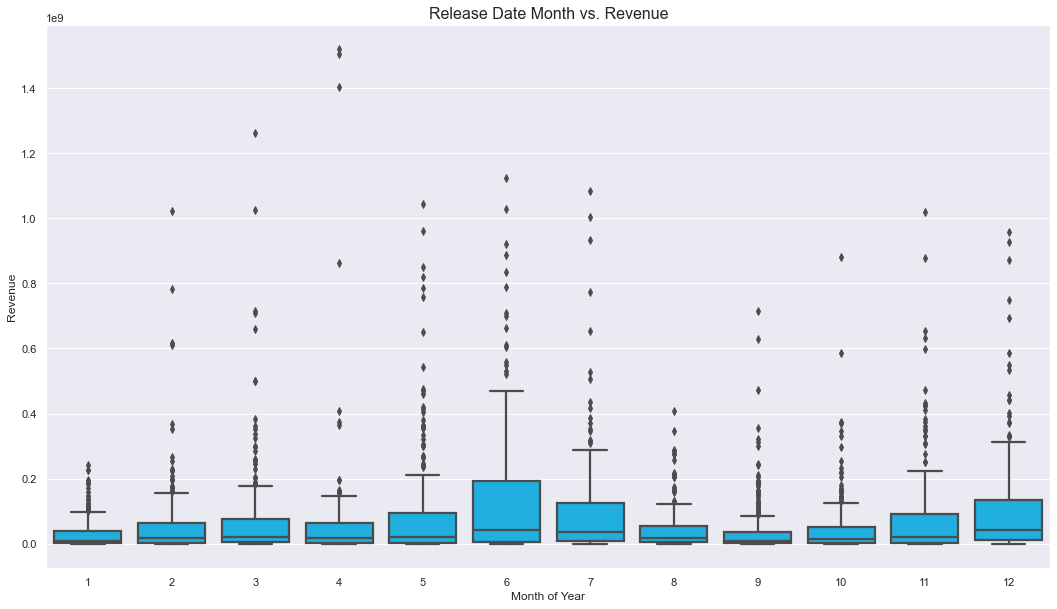

In [16]:
# Plotting Release Data By Month (Boxplot)

fig, cx = plt.subplots()
sns.set_context("talk")
sns.boxplot(x = final_movie['release_month'], y = final_movie['revenue'], color = "deepskyblue")
sns.set(rc = {'figure.figsize':(10, 10)})
cx.set_xlabel("Month of Year", fontsize = 12)
cx.set_ylabel("Revenue", fontsize = 12)
cx.set_title("Release Date Month vs. Revenue", fontsize = 16)

According to the boxplot above, it seems like the months in the summer are the most successful according to revenue. Additionally, the holiday season in December shows a higher number of releases and a higher revenue.

# Analyzing & Plotting Language Data

Originally, the column in this dataset represented all of the languages that a film is released in. It was later changed so that the column has a 1 if one of the movie's spoken languages was Engligh and a 0 if it doesn't include English. This feature may be important because if a film is released in lots of languages, it may reach more people, and therefore increasing revenue.

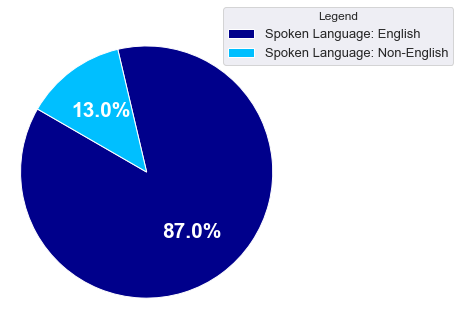

In [17]:
# Plotting Language Data (Pie Chart)

language = [(final_movie.released_in_english == 1).sum(axis=0), (final_movie.released_in_english == 0).sum(axis=0)] # Getting the percentages for the zeroes and ones

# Plot (Pie Chart)

fig = plt.subplots(figsize = (5, 5))
plt.pie(language, autopct = "%0.1f%%", startangle = 150, colors = ("darkblue", "deepskyblue"), textprops = {"color":"w", "fontsize":21, "weight":"bold"})
plt.axis("equal")
plt.legend(labels = ("Spoken Language: English", "Spoken Language: Non-English"), title = "Legend", loc = "center left", fontsize = 13, bbox_to_anchor = (0.75, 0.25, 0.5, 1.5))

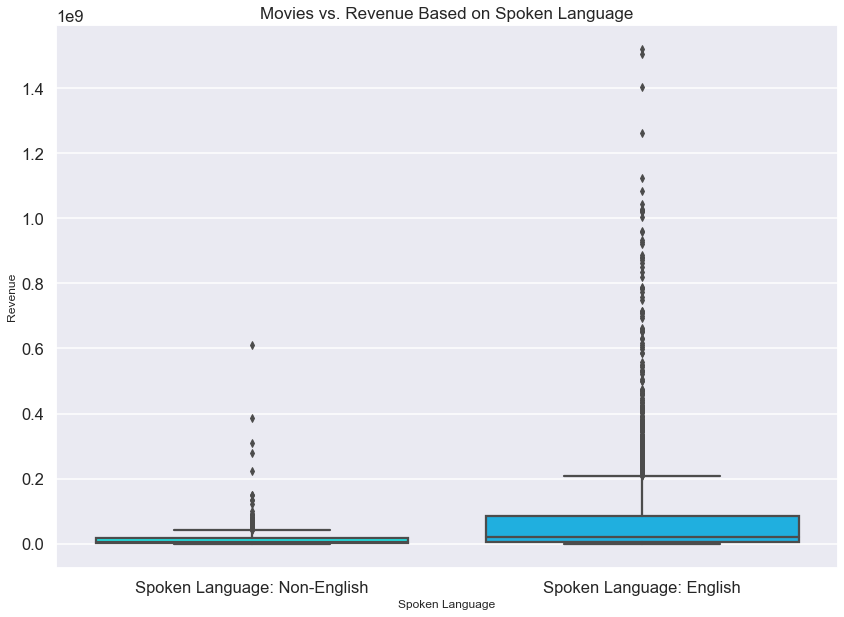

In [18]:
# Plotting Language Data (Boxplot)

labels = "Spoken Language: Non-English", "Spoken Language: English"
sns.set_context("talk")
fig, dx = plt.subplots(figsize = (14, 10))
sns.boxplot(x = "released_in_english", y = "revenue", data = final_movie, palette = ("cyan", "deepskyblue"))
plt.title("Movies vs. Revenue Based on Spoken Language", fontsize = 17)
dx.set_xticklabels(labels)
plt.xlabel("Spoken Language", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.show()

According to the pie chart, the majority of the movies in this dataset have English as a spoken language. The boxplot also shows that revenue seems to be slightly greater for the movies that have English too. This seems to indicate that there may be some sort of positive correlation between a movie having a spoken language of English and revenue. 

## 1.3 Results

Prior to deciding which features may be useful to run linear regression on, I thought it would help to see a heatmap that shows if there was any correlation between some of the above features and what that looks like compared to other features.

In [19]:
heatmap_movie = final_movie.drop(columns=['runtime','id']) # Dropping a duplicate column and a column that doesn't give us any information

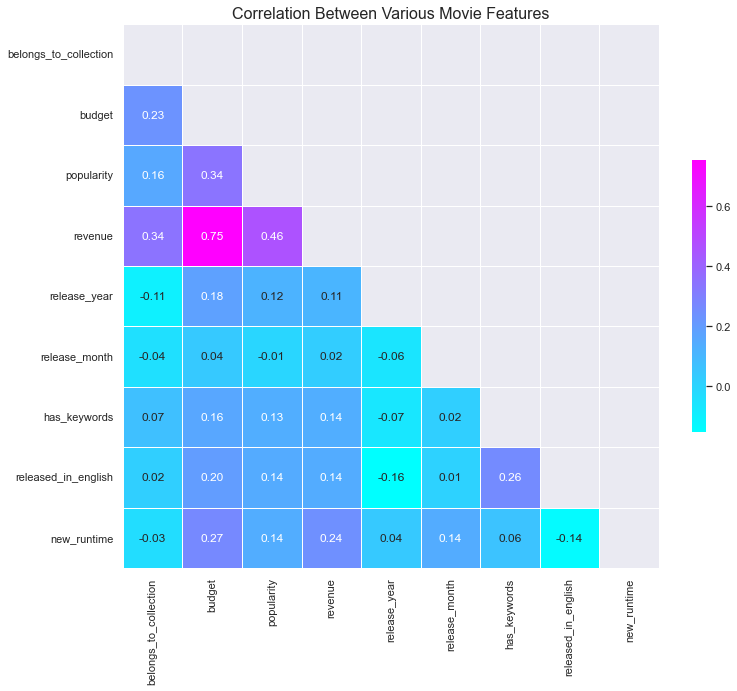

In [20]:
# Plotting Correlation Matrix (Heatmap)

corr = heatmap_movie.corr() # Compute the correlation matrix

# Generate a mask for the upper triangle

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot

sns.set_context("talk")
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f", cmap = 'cool', linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Between Various Movie Features", fontsize = 16)
plt.show()

Based on the heatmap, I have decided to perform linear regression on budget, popularity, and runtime as those appear to be the most correlated and will allow for linear regression to be performed. Although the belongs to collection column has a high correlation, since it is not a numerical variable, it would not allow for linear regression to be ran on it which is why I am leaving it out. 

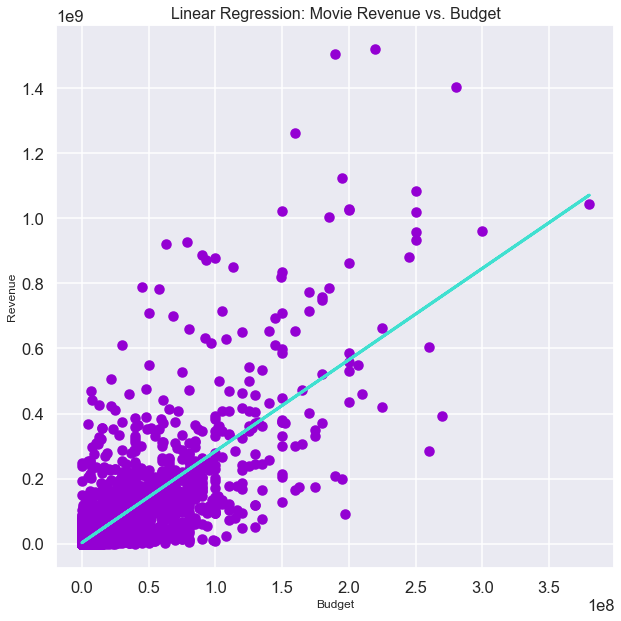

In [21]:
# Linear Regression

reg = LinearRegression()
reg.fit(final_movie['budget'].values.reshape(-1,1), final_movie['revenue'].values.reshape(-1,1))
bpredict = reg.predict(final_movie['budget'].values.reshape(-1,1))

# Plotting Budget Data (Scatter & Linear Regression)

sns.set_context("talk")
plt.figure(figsize = (10, 10))
plt.scatter(final_movie['budget'], final_movie['revenue'], color = "darkviolet")
plt.plot(final_movie['budget'].values.reshape(-1,1),bpredict, color = "turquoise", linewidth=3)
plt.title("Linear Regression: Movie Revenue vs. Budget", fontsize = 16);
plt.xlabel("Budget", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.show()

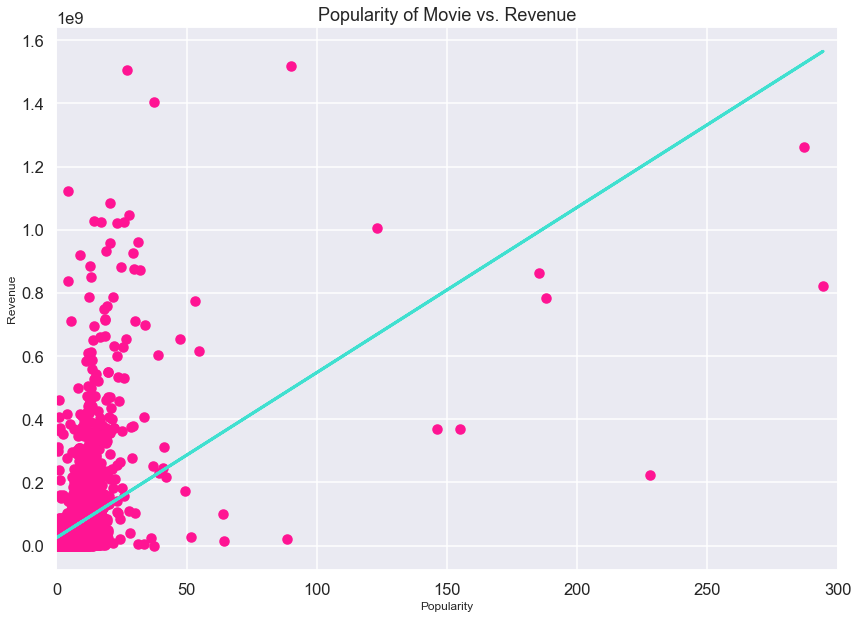

In [22]:
# Linear Regression

reg = LinearRegression()
reg.fit(final_movie['popularity'].values.reshape(-1,1), final_movie['revenue'].values.reshape(-1,1))
bpredict = reg.predict(final_movie['popularity'].values.reshape(-1,1))

# Plotting Popularity Data (Scatter & Linear Regression)

sns.set_context("talk")
plt.figure(figsize = (14, 10))
plt.scatter(final_movie['popularity'], final_movie['revenue'], color = "deeppink")
plt.plot(final_movie['popularity'],bpredict, color = "turquoise", linewidth=3)
plt.xlabel("Popularity", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.title("Popularity of Movie vs. Revenue", fontsize = 18)
plt.xlim([0, 300])
plt.show()

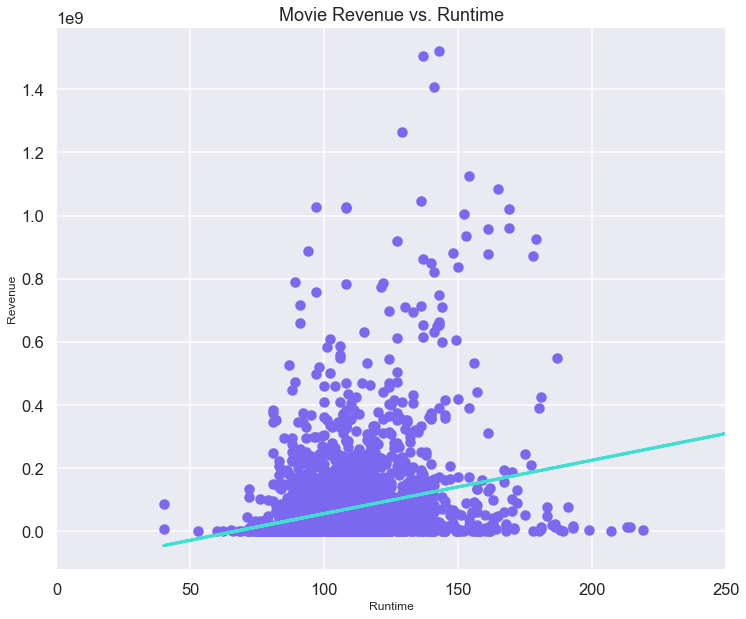

In [23]:
# Linear Regression

reg = LinearRegression()
reg.fit(final_movie['new_runtime'].values.reshape(-1,1), final_movie['revenue'].values.reshape(-1,1))
bpredict = reg.predict(final_movie['new_runtime'].values.reshape(-1,1))

# Plotting Runtime Data (Scatter & Linear Regression)

sns.set_context("talk")
plt.figure(figsize = (12, 10))
plt.scatter(final_movie['new_runtime'], final_movie['revenue'], color = 'mediumslateblue')
plt.plot(final_movie['new_runtime'].values.reshape(-1,1),bpredict, color = "turquoise", linewidth=3)
plt.title("Movie Revenue vs. Runtime", fontsize = 18)
plt.xlabel("Runtime", fontsize = 12)
plt.ylabel("Revenue", fontsize = 12)
plt.xlim([0, 250])
plt.show()

## 1.4 Discussion and Conclusion

 As shown by the linear regression line in the budget versus revenue plot above, it seems that there is indeed a clear positive correlation and it appears to accurately reflect the data. There are a few outliers but the data seems relatively linear.  When looking at the linear regression line in the popularity versus revenue plot, it appears that there is indeed a positive correlation as indicated by the regression line, but the data definitely does not seem to be linear as it is mainly clustered in one specific area with a few outliers. 
   Finally, the last linear regression line in the runtime versus revenue plot also appears to show some sort of positive correlation but the data here is definitely not linear and has quite a few outliers.



Based on the fact that the linear regression line might not be the best fit for the last two plots as the data isn't linear, it might have been better to consider other models such as a bell curve for the last plot and then using the RMSE () to decide which model is the best. I had also intended to calculate the r-squared values for the regression lines, but after doing so, the number was quite large so I decided to get rid of that part entirely as it didn't add any valuable information to my project.
   
   In the future I think I would try to investigate the genre and cast columns more as they seemed to contain a lot of valuable information but were very hard to access and it would've taken more time than I had in order to separate the data into more appropriate columns. I would also try out different models, as I talked a little bit more about above. The last thing I would do is adjust both my budget and revenue columns for inflation, I had tried to install a CPI library but it was giving me problems so I decided to keep the columns the way they were. 
   
   Overall, I believe that the top three movie features that are most correlated with revenue are budget, popularity, and runtime. Based on the heatmap, budget had the highest correlation at 0.75, popularity was 0.46, and runtime was 0.24. Since popularity isn't necessarily known until after the movie comes out, it would be best to use budget and runtime as predictors. 

### References


Api Docs, https://developers.themoviedb.org/3/getting-started/popularity. 

nickmitch21. “TMDB-Box-Office-Prediction/Tmdbmovieboxofficepredictionmodel.ipynb at Master · Nickmitch21/TMDB-Box-Office-Prediction.” GitHub, https://github.com/nickmitch21/TMDB-Box-Office-Prediction/blob/master/TMDbMovieBoxOfficePredictionModel.ipynb. 

somang1418. “EDA + LGB/XGB Modelings with a Cute(!) Panda Meme.” Kaggle, Kaggle, 18 Apr. 2019, https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3. 

“TMDB Box Office Prediction.” Kaggle, https://www.kaggle.com/competitions/tmdb-box-office-prediction/overview. 